In [82]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# plots
import plotly.express as px
import seaborn as sns
# import warnings
import warnings
warnings.filterwarnings("ignore")
# sklearn train test split
from sklearn.model_selection import train_test_split
# transform the text data into numerical data (a document-term matrix)
from sklearn.feature_extraction.text import CountVectorizer
# models
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier
# model evaluation
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [83]:
df = pd.read_csv('spam.csv', encoding="latin-1")
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [84]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [85]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [86]:
# remove the unknown columns in the data sets
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [87]:
# rename the columns in the data set from v1 to Type(spam or not spam) and v2 to text
df.rename(columns={'v1': 'Type', 'v2': 'Text'}, inplace=True)
df.head()

,Type,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [88]:
df.shape

(5572, 2)

In [89]:
df.describe()

,Type,Text
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


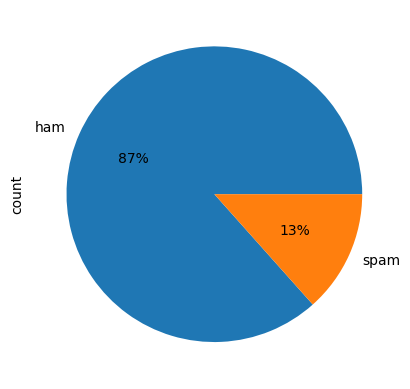

In [90]:
# piechart to see the data distribution
df.Type.value_counts().plot(kind='pie', autopct='%1.0f%%')
plt.show()

   Type                                               Text  Length
0   ham  Go until jurong point, crazy.. Available only ...     111
1   ham                      Ok lar... Joking wif u oni...      29
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...     155
3   ham  U dun say so early hor... U c already then say...      49
4   ham  Nah I don't think he goes to usf, he lives aro...      61


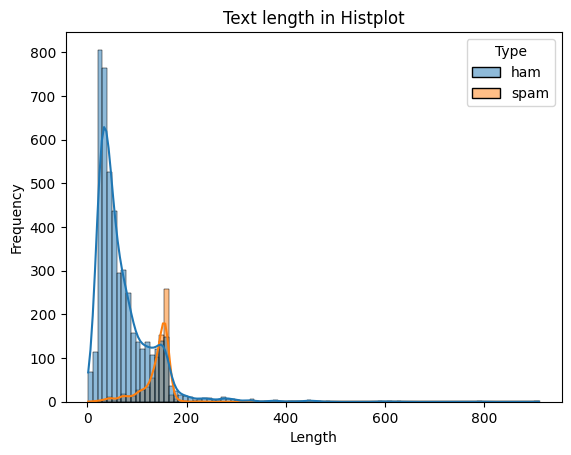

In [91]:
#Let's create a column to check of each text & plot a histogram to check the distirbution
df['Length']=df['Text'].apply(len)
print(df.head())
# histplot by using seaborn library
sns.histplot(df, x='Length',hue='Type', kde=True)
plt.title('Text length in Histplot')
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.show()

In [92]:
fig = px.histogram(df, x='Length', color='Type', marginal='rug',
                   title='Histogram of Text Length by Type')
fig.update_layout(
    xaxis_title='Length',
    yaxis_title='Frequency',
    showlegend=True)

In [93]:
type_convert = {'spam': 0,'ham': 1}
df['Type'] = df['Type'].replace(type_convert)

In [94]:
df.head()

,Type,Text,Length
0,1,"Go until jurong point, crazy.. Available only ...",111
1,1,Ok lar... Joking wif u oni...,29
2,0,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,1,U dun say so early hor... U c already then say...,49
4,1,"Nah I don't think he goes to usf, he lives aro...",61


In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Type    5572 non-null   int64 
 1   Text    5572 non-null   object
 2   Length  5572 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 130.7+ KB


In [96]:

cv = CountVectorizer()
X = cv.fit_transform(df['Text']).toarray()
y= df['Type']
# split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [97]:
print("X_train: ",X_train.shape)
print("X_test: ",X_test.shape)
print("y_train: ",y_train.shape)
print("y_test: ",y_test.shape)

X_train:  (4457, 8672)
X_test:  (1115, 8672)
y_train:  (4457,)
y_test:  (1115,)


In [98]:
# model selection
rd = RandomForestClassifier()
# train the model
rd.fit(X_train, y_train)
# make predictions
y_pred = rd.predict(X_test)
# evaluate the model
print("Random Forest Accuracy:", accuracy_score(y_test,y_pred))
print("Random Forest Precision:",precision_score(y_test,y_pred))
print("Recall Scaore: ",recall_score(y_test, y_pred))
print("f1 Score:",f1_score(y_test,y_pred))

Random Forest Accuracy: 0.9775784753363229
Random Forest Precision: 0.9747474747474747
Recall Scaore:  1.0
f1 Score: 0.9872122762148338


In [99]:
# model selection
lr = LogisticRegression()
# train the model
lr.fit(X_train, y_train)
# make predictions
y_pred = lr.predict(X_test)
# evaluate the model
print("Random Forest Accuracy:", accuracy_score(y_test,y_pred))
print("Random Forest Precision:",precision_score(y_test,y_pred))
print("Recall Scaore: ",recall_score(y_test, y_pred))
print("f1 Score:",f1_score(y_test,y_pred))

Random Forest Accuracy: 0.9775784753363229
Random Forest Precision: 0.9757085020242915
Recall Scaore:  0.9989637305699481
f1 Score: 0.9871991807475679


In [100]:
%%time
# model selection
sv = SVC()
# train the model
sv.fit(X_train, y_train)
# make predictions
y_pred = sv.predict(X_test)
# evaluate the model
print("Random Forest Accuracy:", accuracy_score(y_test,y_pred))
print("Random Forest Precision:",precision_score(y_test,y_pred))
print("Recall Scaore: ",recall_score(y_test, y_pred))
print("f1 Score:",f1_score(y_test,y_pred))

Random Forest Accuracy: 0.97847533632287
Random Forest Precision: 0.9757330637007078
Recall Scaore:  1.0
f1 Score: 0.9877175025588536
CPU times: total: 12 s
Wall time: 58.8 s


In [101]:
%%time
# model selection
mnb = MultinomialNB()
# train the model
mnb.fit(X_train, y_train)
# make predictions
y_pred = mnb.predict(X_test)
# evaluate the model
print("Random Forest Accuracy:", accuracy_score(y_test,y_pred))
print("Random Forest Precision:",precision_score(y_test,y_pred))
print("Recall Scaore: ",recall_score(y_test, y_pred))
print("f1 Score:",f1_score(y_test,y_pred))

Random Forest Accuracy: 0.97847533632287
Random Forest Precision: 0.9885773624091381
Recall Scaore:  0.9865284974093265
f1 Score: 0.9875518672199171
CPU times: total: 391 ms
Wall time: 1.25 s


In [102]:
%%time
# model selection
neural = MLPClassifier()
# train the model
neural.fit(X_train, y_train)
# make predictions
y_pred = neural.predict(X_test)
# evaluate the model
print("Random Forest Accuracy:", accuracy_score(y_test,y_pred))
print("Random Forest Precision:",precision_score(y_test,y_pred))
print("Recall Scaore: ",recall_score(y_test, y_pred))
print("f1 Score:",f1_score(y_test,y_pred))

Random Forest Accuracy: 0.979372197309417
Random Forest Precision: 0.9776876267748479
Recall Scaore:  0.9989637305699481
f1 Score: 0.9882111737570477
CPU times: total: 27 s
Wall time: 1min 22s


In [103]:
# selecting the best model on the bases of accuracy
models = [("Random Forest", rd), 
          ("Logistic Regression", lr),
          ("Support Vector Classifier", sv),
          ("Multinomial Naive Bayes", mnb),
          ("Neural Network", neural)]
best_model = None
best_accuracy = 0.0
for name,model in models:
    if accuracy_score(y_test, model.predict(X_test)) > best_accuracy:
        best_model = model
        best_accuracy = accuracy_score(y_test, model.predict(X_test))
print(f"Best Model: {best_model} with Accuracy: {best_accuracy}")

Best Model: MLPClassifier() with Accuracy: 0.979372197309417


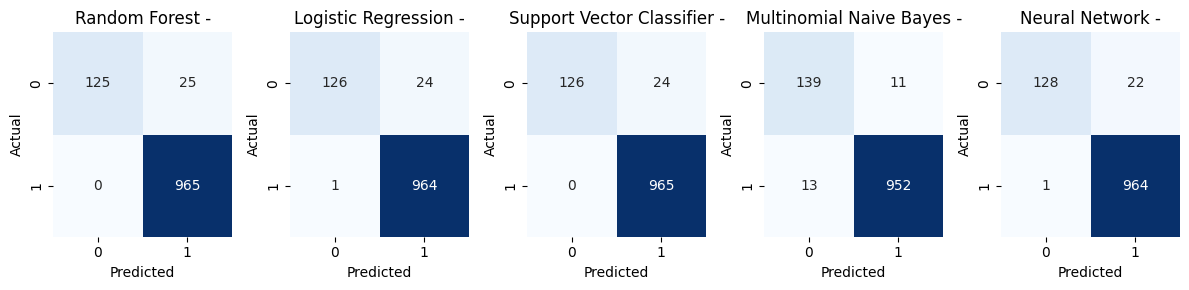

In [104]:
from sklearn.metrics import confusion_matrix
fig, axes = plt.subplots(1, 5, figsize=(12, 3))
for i, (model_name, model) in enumerate(models):
    prediction = model.predict(X_test)
    cm = confusion_matrix(y_test, prediction)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, ax=axes[i])
    axes[i].set_title(f"{model_name} -")
    axes[i].set_xlabel("Predicted")
    axes[i].set_ylabel("Actual")
plt.tight_layout()
plt.show()